# Machine Learning Classification with Scikit-learn

In this notebook, we will be using the Scikit-Learn library to build a machine learning model to predict whether an employee will leave the company or not. We will be using the IBM HR Analytics Employee Attrition & Performance dataset. We processed the original dataset using our ETL script and saved the processed dataset as a CSV file. We will be using this processed dataset for our machine learning model.

- **Author**: [Sergio Cuéllar Almagro](https://www.linkedin.com/in/sergio-cu%C3%A9llar-almagro-00526324/)
- **Date**: February 2023
- **Dataset**: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

## Objectives

Several machine learning models will be trained and evaluated to determine the best model for this classification task. Finally, the most effective model will be used to make predictions on the test data. Overall, we will be following the following steps:
- **Data Preparation**: This involves loading the data. We don't need to preprocess or clean the data since we already did that in the ETL script.
- **Model Selection**: We will be choosing a suitable learning algorithm for the classification task. This can be done by considering the nature of the problem and the type of data, as well as experimenting with different algorithms to find the best fit. We have chosen the following algorithms:
    - Logistic Regression
    - Decision Tree
    - Support Vector Machine
    - K-Nearest Neighbors
- **Model Training**: In this part, we will be feeding the training data into each algorithm to train the model.
- **Model Evaluation**: We will be testing the model on the test data to evaluate its performance, and will be using the following metrics to measure the performance of the model:
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC AUC Score
- **Model Fine-Tuning**: This involves adjusting the hyperparameters of the model to improve its performance. We will do this by using the technique known as grid search. This technique will allow us to find the best combination of hyperparameters for each model.
- **Model Deployment**: We will be using the trained model to make predictions on new data. The model can be deployed in a variety of ways, including as a standalone application, as a web service, or as a component of a larger system. In this notebook though, we will be deploying it as a simple Python script.

Throughout the notebook, the results of each step will be visually represented and analyzed to gain insights and inform the decision-making process.

## Library Imports and Configuration

We will be importing the following libraries:
- **Pandas**: This library is used for data manipulation and analysis.
- **Numpy**: This library is used for scientific computing and numerical operations.
- **Matplotlib / Seaborn**: These libraries are used for data visualization.
- **Scikit-Learn**: This is the library we will be using for machine learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

We will be using this function to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y, y_predict):
    '''Plots a confusion matrix'''
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

## Data Preparation

The data is was already prepared in the ETL script, where we performed the following steps:
- **Data Cleaning**: We removed the following columns from the dataset:
    - EmployeeCount
    - EmployeeNumber
    - Over18
    - StandardHours
- **Data Transformation**: We encoded the categorical columns with only two unique values (Gender and Overtime) into numerical values (0 and 1). We also encoded the target columnt(Attrition). We also encoded the categorical columns with more than two unique values (BusinessTravel, Department, EducationField, JobRole, MaritalStatus, and OverTime) using one-hot encoding.

As this dataset is already clean and prepared, we can load it directly into a Pandas DataFrame.


In [3]:
# Data loading
data = pd.read_csv('data_processed.csv')
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


Next, we will be splitting the data into X and y. X will contain all the features (scaled using the StandardScaler provided by Scikit-Learn) and y will contain the target column (Attrition) as a numpy array.

In [4]:
y = data['Attrition'].to_numpy() # Storing target variable as numpy array in Y

scaler = StandardScaler()
X = data.drop('Attrition', axis=1) # Dropping target variable from data
X = scaler.fit_transform(X) # Scaling data using StandardScaler

Now, we will be splitting the data into training and test sets. We will be using 80% of the data for training and 20% for testing. We will be using the train_test_split function provided by Scikit-Learn.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

## Model Testing

### Logistic Regression

We will be using the LogisticRegression class provided by Scikit-Learn to train a logistic regression model. This model is a statistical method used for binary classification problems (like the one we have in this case). It aims to model the relationship between a set of input features and a binary output variable, and predicts the probability of the output being either 1 or 0.

We will be using the GridSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **C**: Controls the inverse regularization strength.
- **Penalty**: Specifies the type of regularization to be used. This is usually used to prevent overfitting and can be either L1 or L2.
- **Solver**: Specifies the optimization algorithm used to find the best parameters in the GridSearchCV function. We will be using *lbfgs* for this task.

In [6]:
parameters = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l2'],
               'solver': ['lbfgs'],
               'max_iter': [1000, 2000, 3000]} # Parameters for GridSearchCV

In [7]:
logreg = LogisticRegression() # Instantiating the LogisticRegression model
logreg_cv = GridSearchCV(
    estimator=logreg,
    scoring='accuracy',
    param_grid=parameters,
    cv = 5
)   # Instantiating GridSearchCV with the LogisticRegression model
logreg_cv.fit(X_train, y_train) # Fitting the model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000, 2000, 3000], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [8]:
print('Best parameters: ', logreg_cv.best_params_) # Printing the best parameters
print('Best score: ', logreg_cv.best_score_) # Printing the best score

Best parameters:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.8733032816444284


#### Model Evaluation

In [9]:
y_predict = logreg_cv.predict(X_test) # Predicting the target variable for the test set

In [10]:
# Printing the accuracy, precision, recall, f1-score and roc_auc_score
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))
print('F1-score: ', f1_score(y_test, y_predict))
print('ROC AUC score: ', roc_auc_score(y_test, y_predict))

Accuracy:  0.891156462585034
Precision:  0.8214285714285714
Recall:  0.46
F1-score:  0.5897435897435898
ROC AUC score:  0.7197540983606558


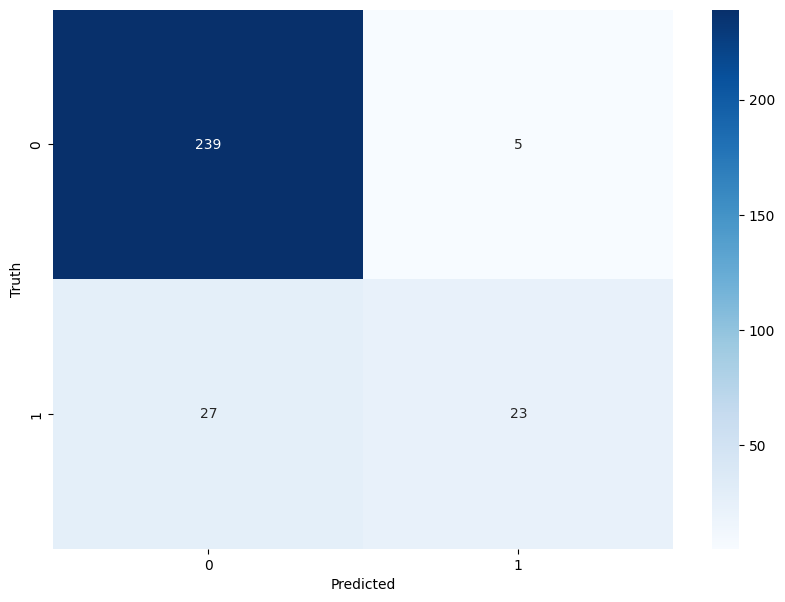

In [11]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_predict)

### Decision Tree

Now, we will be testing the DecisionTreeClassifier model. This model can be used for both classification and regression tasks, but this specifict version is used only for classification. It works by recursively splitting the data into smaller groups based on the values of the input features, and making a prediction based on the group the data point belongs to. They are very powerful and flexible, but they can also be prone to overfitting.

We will be using the GridSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **Criterion**: Specifies the function used to evaluate the quality of a split.
- **Splitter**: Specifies the algorithm used to choose the split at each node.
- **Max Depth**: Specifies the maximum depth of the tree. Deeper trees may result in overfitting, so it is important to set a maximum depth.
- **Min Samples Split**: Sets the minimum number of samples required to split an internal node. Increasing this value may result in underfitting.
- **Min Samples Leaf**: Sets the minimum number of samples required to be at a leaf node. Increasing this value may result in underfitting.


In [12]:
parameters = { 'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]} # Parameters for GridSearchCV

In [13]:
tree_clf = DecisionTreeClassifier() # Instantiating the DecisionTreeClassifier model
tree_clf_cv = GridSearchCV(
    estimator=tree_clf,
    scoring='accuracy',
    param_grid=parameters,
    cv = 5
)   # Instantiating GridSearchCV with the DecisionTreeClassifier model

tree_clf_cv.fit(X_train, y_train) # Fitting the model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [14]:
print('Best parameters: ', tree_clf_cv.best_params_) # Printing the best parameters
print('Best score: ', tree_clf_cv.best_score_) # Printing the best score

Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'}
Best score:  0.8545906959971152


#### Model Evaluation

In [15]:
y_predict = tree_clf_cv.predict(X_test) # Predicting the target variable for the test set

In [16]:
# Printing the accuracy, precision, recall, f1-score and roc_auc_score
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))
print('F1-score: ', f1_score(y_test, y_predict))
print('ROC AUC score: ', roc_auc_score(y_test, y_predict))

Accuracy:  0.8435374149659864
Precision:  1.0
Recall:  0.08
F1-score:  0.14814814814814814
ROC AUC score:  0.54


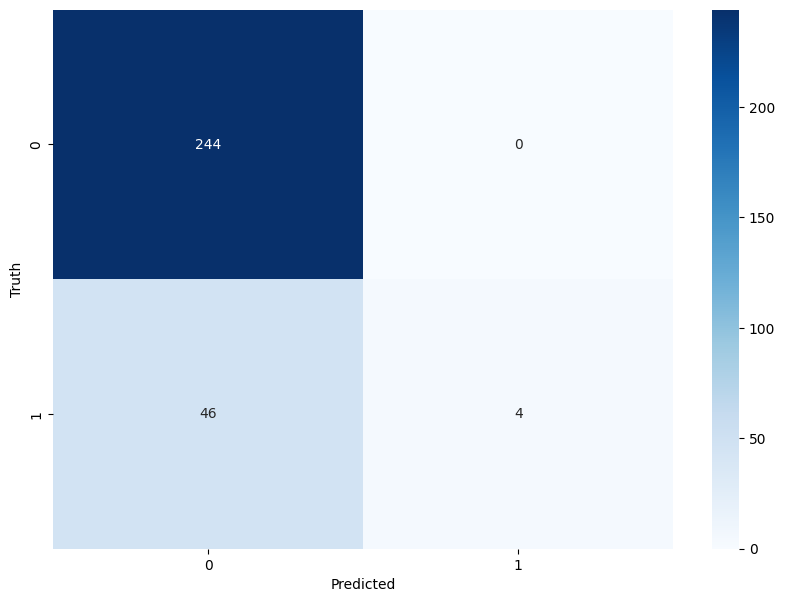

In [17]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_predict)

### Support Vector Machine

Now, we will be testing the SVC model. This model is used exclusively for classification tasks. It works by finding the best boundary that separates the positive and negative classes, and uses this boundary to make predictions. It is very powerful and can be used for both linear and non-linear classification tasks.

We will be using the GridSearchCV function to find the best hyperparameters for the model. We will be using the following hyperparameters:
- **C**: Controls the trade-off between the smooth decision boundary and classifying the training points correctly.
- **Kernel**: Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. If none is given, 'rbf' will be used.
- **Degree**: Specifies the degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
- **Gamma**: Specifies the kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
- **Coef0**: Specifies the independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.


In [18]:
parameters = {'C': np.logspace(-3, 3, 7),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': np.logspace(-3, 3, 7),
              'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'coef0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # Parameters for GridSearchCV

In [19]:
svm_clf = SVC() # Instantiating the SVC model
svm_clf_cv = GridSearchCV(
    estimator=svm_clf,
    scoring='accuracy',
    param_grid=parameters,
    cv = 5
)   # Instantiating GridSearchCV with the SVC model

svm_clf_cv.fit(X_train, y_train) # Fitting the model

In [ ]:
# Printing the best parameters and best score
print('Best parameters: ', svm_clf_cv.best_params_)
print('Best score: ', svm_clf_cv.best_score_)